The urls in tjhe list `fanfiction_urls` contains the ten works inspired by Harry Potter books which have received the highest number of Kudos on [Archive of Our Own](https://archiveofourown.org/) 

In [1]:
harry_potter_urls = [
"https://raw.githubusercontent.com/bobdeng/owlreader/master/ERead/assets/books/Harry%20Potter%20and%20the%20Sorcerer's%20Stone.txt",
'https://raw.githubusercontent.com/bobdeng/owlreader/master/ERead/assets/books/Harry%20Potter%20and%20the%20Chamber%20of%20Secrets.txt',
'https://raw.githubusercontent.com/bobdeng/owlreader/master/ERead/assets/books/Harry%20Potter%20and%20the%20Prisoner%20of%20Azkaban%20.txt',
'https://raw.githubusercontent.com/bobdeng/owlreader/master/ERead/assets/books/Harry%20Potter%20and%20the%20Goblet%20of%20Fire.txt',
'https://raw.githubusercontent.com/bobdeng/owlreader/master/ERead/assets/books/Harry%20Potter%20and%20the%20Order%20of%20the%20Phoenix.txt',
'https://raw.githubusercontent.com/bobdeng/owlreader/master/ERead/assets/books/Harry%20Potter%20and%20the%20Deathly%20Hallows%20.txt',
'https://raw.githubusercontent.com/bobdeng/owlreader/master/ERead/assets/books/Harry%20Potter%20and%20The%20Half-Blood%20Prince.txt'
]
label_corpus1 = 'Harry Potter'

fanfiction_urls = [
'https://raw.githubusercontent.com/peterverhaar/dmt-2024/refs/heads/main/Assignment4/ResearchProject1/Corpus/%20The_Disappearances_of_Draco_Malfoy.txt',
'https://raw.githubusercontent.com/peterverhaar/dmt-2024/refs/heads/main/Assignment4/ResearchProject1/Corpus/All_the_Young%20_Dudes.txt',
'https://raw.githubusercontent.com/peterverhaar/dmt-2024/refs/heads/main/Assignment4/ResearchProject1/Corpus/Draco_Malfoy_and_the_Mortifying_Ordeal_of_Being_in_Love.txt',
'https://raw.githubusercontent.com/peterverhaar/dmt-2024/refs/heads/main/Assignment4/ResearchProject1/Corpus/Evitative.txt',
'https://raw.githubusercontent.com/peterverhaar/dmt-2024/refs/heads/main/Assignment4/ResearchProject1/Corpus/Fate_Is_A_Four_Letter_Word.txt',
'https://raw.githubusercontent.com/peterverhaar/dmt-2024/refs/heads/main/Assignment4/ResearchProject1/Corpus/Heal_Thyself.txt',
'https://raw.githubusercontent.com/peterverhaar/dmt-2024/refs/heads/main/Assignment4/ResearchProject1/Corpus/Manacled.txt',
'https://raw.githubusercontent.com/peterverhaar/dmt-2024/refs/heads/main/Assignment4/ResearchProject1/Corpus/The_Last_Enemy.txt',
'https://raw.githubusercontent.com/peterverhaar/dmt-2024/refs/heads/main/Assignment4/ResearchProject1/Corpus/Then_Comes_a_Mist_and_a_Weeping_Rain.txt',
'https://raw.githubusercontent.com/peterverhaar/dmt-2024/refs/heads/main/Assignment4/ResearchProject1/Corpus/survival_is_a_talent.txt',    
]

label_corpus2 = 'Fan fiction'

In [2]:
import requests
import os
import re
from os.path import basename

directory = 'Corpus2'

if not os.path.exists(directory):
    os.makedirs(directory)
    
import sys
!pip install vaderSentiment
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')
nltk.download('punkt_tab')


def download(url):
    response = requests.get(url)
    if response:
        file_name = basename(url)
        out = open(file_name,'w',encoding='utf-8')
        out.write(response.text)
        out.close()
        
def download_to_corpus(url):
    response = requests.get(url)
    if response:
        file_name = basename(url)
        path = os.path.join(directory,file_name)
        out = open(path,'w',encoding='utf-8')
        out.write(response.text)
        out.close()
        
def find_title(file_name):
    title = basename(file_name)
    title = re.sub('%20',' ',title)
    title = re.sub(r'\'','',title)
    title = re.sub('.txt$','',title.strip())
    return title

def clean_wordlist(words):
    words = [word for word in words if word not in string.punctuation]
    words = [word for word in words if word not in stopwords]
    words = [re.sub(r'([….])|(\')','',word) for word in words]
    words = [word for word in words if re.search(r'\w', word)]
    return words
        
download('https://raw.githubusercontent.com/peterverhaar/dmt-2024/refs/heads/main/Assignment3/text_mining.py')

for url in harry_potter_urls:
    download_to_corpus(url)
    
for url in fanfiction_urls:
    download_to_corpus(url)
    
    
out = open('metadata.csv','w',encoding='utf-8')
out.write('text,category\n')
for url in harry_potter_urls:
    out.write(f"{find_title(basename(url))},'{label_corpus1}'\n")
for url in fanfiction_urls:
    out.write(f"{find_title(basename(url))},'{label_corpus2}'\n")

out.close()


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1091)>
[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1091)>
[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify
[nltk_data]     failed: unable to get local issuer certificate
[nltk_data]     (_ssl.c:1091)>
[nltk_data] Error loading averaged_perceptron_tagger_eng: <urlopen
[nltk_data]     error [SSL: CERTIFICATE_VERIFY_FAILED] certificate
[nltk_data]     verify failed: unable to get local issuer certificate
[nltk_data]     (_ssl.c:1091)>
[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     

In [3]:
import requests
import re
import os
import string
string.punctuation += '-•“”’– '
from text_mining import *

from os.path import join

from nltk import word_tokenize,sent_tokenize,pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn

stopwords = stopwords.words('english')

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
ana = SentimentIntensityAnalyzer()


In [4]:

corpus = os.listdir(directory)
corpus = [os.path.join(directory,text) for text in corpus if re.search(r'txt$',text) and not(re.search(r'lemma',text))]

for text in corpus:
    print(text)
    
metadata = pd.read_csv('metadata.csv')

Corpus2/Then_Comes_a_Mist_and_a_Weeping_Rain.txt
Corpus2/Harry%20Potter%20and%20the%20Goblet%20of%20Fire.txt
Corpus2/%20The_Disappearances_of_Draco_Malfoy.txt
Corpus2/Harry%20Potter%20and%20the%20Sorcerer's%20Stone.txt
Corpus2/Draco_Malfoy_and_the_Mortifying_Ordeal_of_Being_in_Love.txt
Corpus2/Manacled.txt
Corpus2/Fate_Is_A_Four_Letter_Word.txt
Corpus2/Harry%20Potter%20and%20the%20Deathly%20Hallows%20.txt
Corpus2/Harry%20Potter%20and%20The%20Half-Blood%20Prince.txt
Corpus2/Heal_Thyself.txt
Corpus2/Harry%20Potter%20and%20the%20Order%20of%20the%20Phoenix.txt
Corpus2/The_Last_Enemy.txt
Corpus2/survival_is_a_talent.txt
Corpus2/Harry%20Potter%20and%20the%20Chamber%20of%20Secrets.txt
Corpus2/Evitative.txt
Corpus2/Harry%20Potter%20and%20the%20Prisoner%20of%20Azkaban%20.txt
Corpus2/All_the_Young%20_Dudes.txt


## Linguistic features

For each text, the number of characters, the number of words and the number of sentences are calculated. Using these data, we can compare the avarage word lengths and the average sentence lengths of all the novels. 

In [5]:
data = []

for file in corpus:
    print(f'Analysing {file} ... ')
    row = []
    text = open(file,encoding='utf-8')
    full_text = text.read()
    
    # Calculate number of characters (without spaces)
    full_text_no_spaces = re.sub( r'\s','',full_text)
    nr_characters = len(full_text)
    
    # Calculate number of words
    words = word_tokenize(full_text.lower())
    words = remove_punctuation(words)
    nr_tokens = len(words)
    
    avg_word_length = nr_characters / nr_tokens
    
    row.append(nr_tokens)
    row.append(nr_characters)
    row.append(avg_word_length)
    
    sentences = sent_tokenize(full_text)
    nr_sentences = len(sentences)
    row.append(nr_sentences)
    avg_sent_length = nr_tokens/nr_sentences
    
    row.append(avg_sent_length)
    
    first_2000 = words[:2000]
    unique = list(set(first_2000))
    ttr = len(unique)/len(first_2000)
    row.append(ttr)
    
    row.append(find_title(file))
    print(find_title(file))
    category = metadata.query( f"text=='{find_title(file)}' " )['category'].values[0]
    row.append(category)
    data.append(row)
    
columns = ['nr_tokens','nr_characters','word_length','nr_sentences','words_per_sentence','ttr','title','category']
df = pd.DataFrame(data, columns = columns)

Analysing Corpus2/Then_Comes_a_Mist_and_a_Weeping_Rain.txt ... 
Then_Comes_a_Mist_and_a_Weeping_Rain
Analysing Corpus2/Harry%20Potter%20and%20the%20Goblet%20of%20Fire.txt ... 
Harry Potter and the Goblet of Fire
Analysing Corpus2/%20The_Disappearances_of_Draco_Malfoy.txt ... 
The_Disappearances_of_Draco_Malfoy
Analysing Corpus2/Harry%20Potter%20and%20the%20Sorcerer's%20Stone.txt ... 
Harry Potter and the Sorcerers Stone
Analysing Corpus2/Draco_Malfoy_and_the_Mortifying_Ordeal_of_Being_in_Love.txt ... 
Draco_Malfoy_and_the_Mortifying_Ordeal_of_Being_in_Love
Analysing Corpus2/Manacled.txt ... 
Manacled
Analysing Corpus2/Fate_Is_A_Four_Letter_Word.txt ... 
Fate_Is_A_Four_Letter_Word
Analysing Corpus2/Harry%20Potter%20and%20the%20Deathly%20Hallows%20.txt ... 
Harry Potter and the Deathly Hallows 
Analysing Corpus2/Harry%20Potter%20and%20The%20Half-Blood%20Prince.txt ... 
Harry Potter and The Half-Blood Prince
Analysing Corpus2/Heal_Thyself.txt ... 
Heal_Thyself
Analysing Corpus2/Harry%20Po

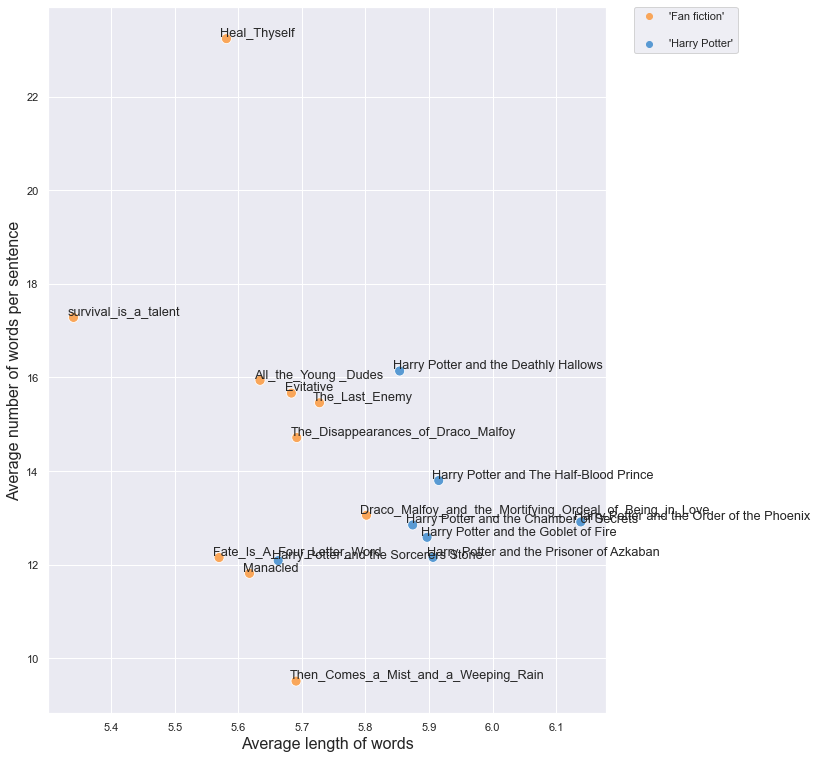

In [8]:
x_axis = 'word_length'
y_axis =  'words_per_sentence'
hue = 'category'

colours = ['#f9a65a','#599ad3']

fig = plt.figure( figsize = ( 10,13 ))

## This line adds spacing in between the lines of the legend 
sns.set(rc = {'legend.labelspacing': 1.6})

ax = sns.scatterplot( data=df, x=x_axis, y=y_axis,  
                     hue = hue,  palette=colours ,  s=100 )

for index, row in df.iterrows():
    plt.text( row[x_axis]-0.01, row[y_axis]+0.05 , row['title'] , fontsize=12.8)


ax.set_xlabel( 'Average length of words'  , fontsize = 16 )
ax.set_ylabel( 'Average number of words per sentence'  , fontsize = 16 )
#ax.set_title( '' , fontsize=24 )
plt.legend( bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.);

plt.savefig( 'scatterplot.png' , dpi=300 )

## Type-token ratio

The type-token ratio can be calculated by dividing the number of unique words (the types) by the total number of words (the tokens). The number gives [an indication of the lexical diversity](https://cdsleiden.github.io/tdm-tutorial/notebooks/5%20Type-token_ratio.html). 

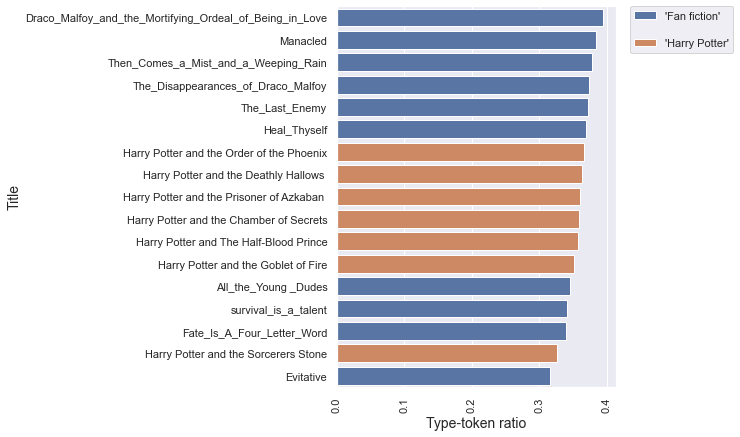

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

x_axis = 'ttr'
y_axis = 'title'
hue = 'category'

colours = ['#599ad3','#f9a65a']

fig = plt.figure( figsize=( 5,7 ) )

df_sorted = df.sort_values(by=[ x_axis] , ascending = False)

graph = sns.barplot( data=df_sorted , x=x_axis, y=y_axis, 
                   hue = hue , dodge = False)

#graph.set_title('' , size = 20) 
graph.set_xlabel('Type-token ratio' , size = 14) 
graph.set_ylabel('Title' , size = 14 )

plt.xticks(rotation= 90)

plt.legend( bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.);

plt.show()

## Most frequent words

The words have been lemmatised first.

In [10]:
for file in os.listdir(directory):
    if re.search( 'lemma.txt',file ):
        path = os.path.join(directory,file)
        with open(path,encoding='utf') as fh:
            full_text = fh.read()
            words = word_tokenize(full_text.lower())
            # stopwords and punctuation is removed
            words = clean_wordlist(words)
            freq = Counter(words)
            key = re.sub('_lemma','',path)
            print(f"\n{find_title(key)}\n")
            for word,count in freq.most_common(15):
                print(f'{word} ({count})')



Harry Potter and the Order of the Phoenix

say (4271)
harry (4109)
nt (1417)
look (1361)
ron (1305)
hermione (1247)
get (959)
go (897)
know (805)
back (796)
think (752)
well (709)
sirius (646)
dumbledore (645)
see (606)

Harry Potter and the Goblet of Fire

harry (3128)
say (2877)
nt (1268)
look (1092)
ron (1040)
hermione (836)
go (781)
get (777)
back (604)
dumbledore (579)
know (537)
mr (522)
see (493)
come (487)
think (445)

Manacled

hermione (3591)
say (2010)
draco (1559)
hand (1369)
go (1368)
look (1288)
eye (1261)
back (1146)
know (1089)
try (1019)
malfoy (974)
felt (945)
think (914)
get (889)
star (869)

Fate_Is_A_Four_Letter_Word

harry (52)
say (31)
franklin (21)
auror (18)
potter (14)
hencliffe (13)
look (12)
child (12)
hand (11)
mr (11)
go (10)
death (9)
aurors (8)
back (8)
take (8)

All_the_Young _Dudes

remus (10133)
sirius (5773)
say (3693)
james (2953)
look (2483)
get (2460)
go (2361)
know (2253)
back (1909)
think (1757)
want (1485)
time (1431)
come (1177)
make (1159)
s

## Unique words

In [11]:
categories = list(metadata['category'].unique())

corpus1 = []
corpus2 = []
corpus1_freq = Counter()
corpus2_freq = Counter()

for text in corpus:
    category = metadata.query( f"text=='{find_title(text)}' " )['category'].values[0]
    if category == categories[0]:
        corpus1.append(text)
    else:
        corpus2.append(text)

for text in corpus1:
    file = open(text,encoding='utf-8')
    full_text = file.read()
    words = word_tokenize(full_text.lower())
    words = remove_punctuation_and_stopwords(words)
    corpus1_freq.update(words)

    
for text in corpus2:
    file = open(text,encoding='utf-8')
    full_text = file.read()
    words = word_tokenize(full_text.lower())
    words = remove_punctuation_and_stopwords(words)
    corpus2_freq.update(words)

In [12]:
print(f'The list below indicates the 20 most frequent words in the {categories[0]} subcorpus.\n')

for word,count in corpus1_freq.most_common(20):
    print(f'{word} => {count}')

The list below indicates the 20 most frequent words in the 'Harry Potter' subcorpus.

harry => 17971
said => 14409
ron => 6242
hermione => 5274
could => 3351
dumbledore => 3262
back => 3204
would => 2666
one => 2588
like => 2356
looked => 2344
know => 2251
around => 2177
got => 2105
hagrid => 2005
professor => 1961
see => 1907
though => 1811
snape => 1793
think => 1733


In [13]:
print(f'The list below indicates the 20 most frequent words in the {categories[1]} subcorpus.\n')

for word,count in corpus2_freq.most_common(20):
    print(f'{word} => {count}')

The list below indicates the 20 most frequent words in the 'Fan fiction' subcorpus.

said => 14467
draco => 14322
harry => 12333
remus => 11667
sirius => 8433
hermione => 7655
back => 7330
like => 7273
would => 6407
one => 6245
could => 6147
know => 5506
james => 5018
eyes => 4684
even => 4542
get => 4423
granger => 4251
time => 4227
going => 4037
says => 3937


In [14]:
print(f'The following words from the {categories[0]} subcorpus are NEVER used in the {categories[1]} subcorpus\n')

for word,count in corpus1_freq.most_common():
    if word not in corpus2_freq.keys():
        print(word)

The following words from the 'Harry Potter' subcorpus are NEVER used in the 'Fan fiction' subcorpus

morfin
nigellus
ariana
aragog
cattermole
quot
norbert
bane
errol
ern
firs
ronan
dumbledores
cole
kendra
burkes
anythin
hokey
fletcher
magorian
magnolia
lynch
paddock
schoolbag
piers
lookin
turban
moran
snapes
pincers
demelza
warningly
hangleton
twittering
mostafa
championship
twycross
gurg
moodys
peakes
harper
karkus
kwikspell
pinstriped
leprechauns
tensely
unblinkingly
headmistresses
meself
streetlamps
belby
mason
vos
moldy
unfogging
autograph
ar
bullfrog
ignotus
grawpy
inferius
coote
bole
grapefruit
toffees
bulgarians
barry
mullet
mornin
malevolently
toads
grayish
las
slanting
rons
unkempt
phlegm
ripper
patrick
weatherby
shamrock
dimitrov
dustbins
stationary
soccer
magenta
vulture
mighta
chessmen
sloper
omens
lyin
mimbletonia
headlights
doxys
monocle
golgomath
windshield
fireside
aaah
levski
dears
chops
walrus
wastepaper
deathday
canary
hagrids
iced
wen
giantess
cant
berserk
thwarted


suitability
evildoers
apollyon
pringle
ogg
bodrod
patrollers
junction
strewing
gluey
secretion
wil
lrenew
revenged
immensity
mightier
commoners
entombed
rebirthing
sleeplessly
jackals
solidest
densest
faithless
independence
frequendy
noooo
quiedy
regurgitate
interrogatively
resettled
matress
exemplified
durmstrangs
asunder
vork
southward
electronic
antennae
furnunculus
disembark
您下载的文件来自http
undursleyish
gossiped
getups
baker
dialing
rejoice
newscaster
mcguffin
weatherman
viewers
dundee
howard
headlight
dolphins
swarmin
yvonne
duddydums
barbers
hoodlums
cobras
snoozed
thanksss
amigo
gibber
tailcoats
boaters
proudest
dudleykins
dota
wight
whelk
scruffs
processor
multilevel
humberto
puddin
fattenin
sony
cryin
mimblewimble
thumpin
chf
confed
gorgons
nonmagic
gulpin
clouted
dumbled
dormice
payin
deliverin
fetchin
mentionin
highsecurity
messin
bungler
tags
phyllida
arsenius
jigger
quentin
trimble
needin
spleens
ledgers
eyeglasses
stalagmites
stalactite
ravine
wizardin
vindictus
382
swishy
p

mackintosh
piocketed
incumbent
tweedy
sammer
nuflink
siow
dunnit
verges
viaduct
superciliously
lamentable
invader
falsehoods
incursion
montns
ream
snaky
longbotwm
broderich
miriam
bodes
spokeswizard
aved
concussing
freakish
screechsnap
doubters
ornithomancy
heptomology
crup
redoubling
fluctuations
plight
frostiness
hogsmeaders
cherubs
canvassed
nightmarishly
unglued
larry
unlikeliest
eermione
unemployment
contends
unforseen
iwo
hieroglyphs
logograms
qua
goalkeeping
butlerbeer
squatly
thais
bombarded
ie
reprinting
agairst
aftet
ior
masteries
retuse
tomorrows
countersigned
eintrance
springily
playthings
oohs
blinkered
fettered
tides
squally
attemp
killjoy
shamming
inattention
lins
unimpaired
pa
shirtsleeve
gryffincor
maltby
creakily
busily
regulator
pyrotechnical
summonses
deflagration
sparkler
whizzes
mated
hew
breezier
unchallenged
policing
booklets
alahomora
opalescent
tc
averaging
teensiest
stretchec
sorer
berks
belled
rumoured
horsewhip
droves
blackboards
juggled
tarantulas
unscrews

In [15]:
print(f'The following words from the {categories[1]} subcorpus are NEVER used in the {categories[0]} subcorpus\n')

for word,count in corpus2_freq.most_common():
    if word not in corpus1_freq.keys():
        print(word)

The following words from the 'Fan fiction' subcorpus are NEVER used in the 'Harry Potter' subcorpus

theo
millie
ferox
fuck
christopher
fucking
astoria
soulmate
quinn
stroud
pulls
blinks
shrugs
grabs
castor
cassius
danny
couch
diagnostic
opens
snaps
asim
uh
aurore
alodie
livia
pete
topsy
larsen
pushes
leans
nanaia
edmund
henriette
repeats
guys
anson
piss
zaira
chris
catalina
necromancy
sophia
sharon
gaius
prank
housemates
estate
zir
tracey
scowls
lyall
reeve
abigail
physically
quirked
pissed
akeakamai
hesitates
rubs
fabric
foyer
marquis
whisely
theophania
goggin
learnt
laboratory
sex
lab
huffed
assumes
satchel
sussex
multiple
tamil
sighing
stilled
trans
tumblr
samhain
ailauni
alcohol
hallways
shoves
1976
vials
bugger
necromancer
manages
twists
jeremy
muggleborns
instagram
gut
vince
nundu
aisha
rites
cocked
slides
closes
muggleborn
trident
greg
sternum
gross
supposes
huffs
greets
assignment
flashback
bowie
fic
warded
hilarious
jotter
harass
cigarettes
tugs
snuck
levitated
gala
horrid
eq

simpler
citrus
logistical
plaintive
sensory
mucked
hiring
responsive
researched
processed
noncommittally
reams
kensington
germany
viewing
scientific
aloof
fixated
predator
sympathisers
corresponding
vessel
stabilised
innocents
bloodline
solving
chores
recruits
projects
coaxing
donated
samuel
cohort
skittish
finesse
weddings
plummet
anonymity
skirmishes
deigned
counteract
listless
jotted
continent
discount
motivation
strokes
closets
consequence
launches
delightfully
petition
exaggeration
beastly
enquire
data
snooping
sanitatem
assessing
smallish
punches
sans
caeli
hence
hobbies
quashed
wells
recesses
inane
incurable
advancements
driessen
turf
quizzed
nefarious
barreling
belatedly
fare
ethics
benevolence
patent
inverted
arsenal
caramel
swatted
flooing
ferry
fatigued
paranoia
chalkboard
danish
authoritative
abundance
navigating
processing
waylaid
daft
insufficient
erection
glamoured
approximation
psyche
appropriately
predatory
availability
clout
smother
lust
moist
fundamentally
brunt
nost

kitted
intermingled
grovel
appreciating
conspiring
dismantle
dimples
haughtiness
courts
amplifying
obscurity
petered
snobby
arithmantic
retraction
afloat
obtaining
frenetic
abrasive
glean
abuzz
fliers
stalemate
duellist
retake
inroads
needless
shopkeepers
carting
geometric
aflame
collateral
rails
accumulate
cameras
duellists
engineering
lineage
stirrings
protects
crafting
flutes
bachelor
assessed
insignia
calibre
backhanded
analysed
provenance
ponce
jargon
querying
unholy
snippy
edinburgh
glovebox
famished
protein
trend
celtic
lughnasadh
austrian
somethings
intellectual
teas
mythology
placard
offal
riotous
charitable
harrowing
manchester
flexibility
perspiration
reproach
mediwitches
auditorium
cancer
ailment
participants
pilot
afoot
doyle
depletion
curtseyed
stodgy
devastatingly
gob
bollocksed
interferes
whiffs
participated
analytical
attributes
rile
gentlemanly
banoffee
isles
takeaway
delaying
viper
peat
thaw
treatise
bouncy
penises
infants
psychic
napping
imbecile
longish
panna
cotta

whizz
coffins
blunted
gags
heartbreak
unknowns
shambles
replication
veneer
broadcasting
conjecture
landmarks
apex
misstep
conundrum
owling
cleanse
confiscating
variables
omission
advantageous
colouring
frustrations
magnets
catholic
cobra
treasury
mapping
dropper
nationwide
humourless
successes
circuitous
shimmied
regrouped
cycling
aven
snaking
cocooned
seabirds
prodigy
sheathed
millimetres
artistic
confessions
stairways
erratically
barricades
arithmancer
yay
occupations
battlement
furrow
angst
buckling
clandestine
hypotheticals
kudos
zeroes
shutter
signals
aggravation
ribbed
unraveller
primed
bookseller
manoeuvres
starlit
overreaction
disconnecting
intersecting
medallion
burlap
leached
consequential
preen
fantasised
prideful
ceramic
upended
throes
outlived
idk
marie
vitriol
informants
handshakes
reclaimed
illusory
leniency
agile
aftershocks
omitting
tornado
goad
wandtips
bleached
combustible
scrutinising
proxy
intensifying
volleyed
outmatched
factory
tbh
reel
grovelled
handprint
resoun

shoos
sequins
coworkers
dumps
nīṅkaḷ
grammar
comprehending
wrangle
bulstrodes
fireweeds
redwoods
doxies
spearing
pic
illuminates
pickles
randomly
whacks
emerges
roster
alloy
avarkaḷ
overeager
refresher
gapes
mathematical
thunders
rumbles
unrealistic
semi
evils
defends
fiancé
decomposition
herds
aiden
statistically
funniest
fittings
prestige
dialects
stresses
bikini
unphased
malleable
condone
solidifies
hydrangeas
searches
hieroglyphics
mycenean
vinculis
catenisque
vecordia
lacrimam
traumatized
smushed
ticks
straightens
auguamenti
mankind
dominant
accompanies
matrix
bystander
moat
pledge
ballsack
shopkeeper
bullseye
grasps
cassidy
stooges
incantantum
deepen
beatboxing
mocks
traction
skewer
technology
lends
apprenticing
commonplace
neutralizing
etiquette
unofficially
builders
grouses
editions
outed
metamorphmagi
rebounds
formality
bitching
empathetic
alchemizing
studs
alcoholic
earful
deferential
incompatible
amplify
snooty
rhiannon
depository
disheartened
widespread
gladiator
apathy
cha

titillated
discerning
kneed
credibility
grenadil
finalise
ceremonial
koi
anteroom
loll
faraday
authenticity
wines
crotchy
craftsmanship
islamic
excalibur
nostradamus
styled
argonaut
fleece
broodily
playfulness
unamused
nebulous
sleight
tapas
ubiquitous
trombone
cobblestoned
gallego
druids
sugars
celts
thresholds
snugness
clans
maud
foetus
chrysanthemums
belfords
passivity
gemino
birches
dedications
heartfelt
lorraines
polyhedron
capsids
pentagons
hverfðar
syntax
infusing
harshness
hyperbolic
état
hazardous
axes
overplayed
persists
faux
rends
unladylike
touchings
philosophies
garters
parameters
bicep
hazards
untenable
tertiary
leverburgh
glassware
terrain
morph
fanatics
gravitas
penna
petrifications
hemmed
dismemberment
suffocatus
byproduct
douse
collaborative
unhallowed
underworld
brimstone
qui
tuum
amen
auras
blurting
ghoulish
uninspired
monsieurs
recuperation
terris
tots
liberate
suis
tout
mole
provocative
divest
panache
accessibility
soliloquy
horizontally
turgid
complexities
shrink

semantics
graduates
integration
slimey
undergear
everyplace
sneezes
gingersnap
conceivably
hypothetically
balances
scrunchy
flyer
wilts
warrants
alibi
crams
necked
undershirt
preachy
advisement
grader
cashing
bengali
puppets
blech
prompting
unsympathetically
100k
oneshot
saris
practicality
biter
kakusareta
bustles
sari
underdressed
renewal
bubblegum
lengthen
shortens
grossest
filpendio
skims
ventus
propels
molasses
buckles
glaringly
tropes
discomforting
harlot
quickness
lattes
finance
prevents
ganged
sooth
singe
cyclone
manufactured
intones
sledgehammer
muffles
sharpens
secare
clenches
lockheart
wracking
uncorks
pomfey
icarus
medusa
neater
spikey
tenseness
bluejay
carter
google
nadu
nām
vēṇṭum
piṉṉar
aṅku
paṟakka
nalla
atikamāka
grammatically
kōṭai
kālattil
uṅkaḷ
vaṇakkam
complies
paṭittu
piragu
piṟaku
forgoing
lease
spectate
exudes
resurrecting
enlightening
disowning
dumber
otherworldly
hos
kālai
firebird
permeant
rinmarus
deterrent
loosens
girth
prioritize
noogie
flounders
fission
tr

tenting
concealments
majesty
espoused
restorations
tunneling
livable
switzerland
blowup
heartbroken
squabbled
ellerion
sleepwalk
repack
claimants
fluffing
straggled
blasphemed
bolstering
unknitting
personified
doddering
checkered
rehabilitation
dissenters
lawsuits
predominantly
squiggled
sanitation
clomping
317b
mailed
composited
interviewees
silkier
noteworthy
encroachment
absolutist
commonalities
finnish
visitation
journalistic
redistributed
elinor
mixologists
poshest
detestable
interpersonal
responsiveness
capitals
brags
substantiated
deferring
claustrophobia
proliferating
thumbprint
headstrong
mismanaged
unmarred
remorselessness
unquestioningly
scorned
reformation
cultures
tidbit
setup
specialises
docker
headier
shorted
backtrack
defecting
oafish
aprons
stud
avatars
lipsticks
eyeshadow
advertising
shorthanded
minotaur
moulds
vocation
billions
chequered
synthetic
farcical
obsessives
subhuman
irreconcilable
unmoored
falsified
milliseconds
lazier
multinational
frictionless
soundscape


mouldings
iconography
monastic
cela
plaisir
desensitised
moderated
unsociable
ladylike
witchlike
exodus
botany
flitters
roofline
contraindicated
gâteaux
fontaine
quatre
monde
fremiet
quarrels
inventoried
nanoparticle
sweats
ménage
trois
outranking
missile
partygoers
risible
grang
shakespearean
whys
kidlet
partook
dalliances
diametrical
irreproachably
ungenerous
expressionlessly
input
townspeople
eclipses
magnesium
lithium
bumble
bimbling
racers
racer
harridanly
macassar
longbottomed
holidaying
mugglewear
tournesol
hilltops
peppy
provençal
parisian
rural
gorges
convivial
flatlands
budle
extermination
mollusc
fusty
undertook
raillery
bookshops
cistercian
datte
fourrée
pâte
cater
caleruega
redoing
installation
disintegrate
gulls
gaspings
sagacity
appétit
protrusion
bandits
forky
email
texting
supplement
agencies
spendy
pharmacokinetic
preclinical
toxicology
bioanalytical
outlay
gcp
gmp
glp
mhra
ema
biologics
commercially
embryonic
vitro
exogenous
paradoxical
une
accordionist
shags
faff
ar

mmmmm
nto
denoting
machination
wobblier
atrophied
olfactory
disassociated
acclimate
imperiness
repopulating
terminated
miscarried
uteruses
dissociative
halve
pleeeease
dole
vitally
infertility
spastically
openers
inlaying
households
inconveniencing
psych
ingraining
nude
appraisals
engender
blinders
impotent
indoctrinated
petite
elevating
reproduction
inasmuch
appeasing
vices
defenselessness
nicoagain
depict
revulsed
impairing
commodity
contemplations
bludgeoned
rawness
excise
mottling
recites
340
emily
dickinson
ritualistically
developer
attributable
spruce
elude
preeminent
rationalised
outerwear
impetuousness
caking
lydia
abdicated
diversifying
diversification
infamously
scandinavian
socialite
charities
subtext
refolded
diets
unsauced
enraging
dehumanise
comers
evoke
autopsy
redeem
clearest
endlessness
supercede
boonookie
skitter
placements
wintering
unclouded
buffed
beckons
nikita
jobson
nayyirah
weheed
ambiguously
coatroom
sideboards
overabundance
restrictive
adrenal
glands
implicit

pēcuvōm
ippōtu
cāppiṭu
āṅkilam
pēcu
eṉṟāl
babied
dunderheaded
bossiness
outweighs
pacified
inception
facet
elective
uncrosses
unshrink
kalai
vanakkam
muṭi
oru
venice
autopilot
eviscerating
jerseys
anway
uṇavu
imbedded
gallops
crepitus
outrunning
tsuraiwrites
diayaorbit
ventilated
aftershock
eucalyptus
unrefined
writhes
airtight
unplanned
snarks
rehabilitate
disapear
exfoliating
warmness
proess
territorialism
interloper
impeached
enroll
unrest
bankroll
portfolios
maximize
capita
cashflow
barometer
destabilizes
piranhas
legislature
felons
certification
accost
steamrolls
kashvi
shingles
bops
okjooonfire
info
figuratively
souring
testimonials
priming
overruling
amour
taskmaster
signoff
grumbly
fiendishly
titanium
approvals
opintion
heater
ēṟkaṉavē
iṅkē
irukkiṟārkaḷ
utava
muṉvantōm
āṉāl
maṟuttuviṭṭārkaḷ
periya
kōpattai
pāḻākkiviṭṭāl
iruppārkaḷ
unfolds
bhaji
sunburns
lazes
openvand
ecosystem
redwood
banyan
prepares
unescorted
unties
emphasizes
stipulates
cinches
aneurisms
delish
mobbed
congr

cypress
nickel
dollar
mandeville
lillies
app
aperio
sectumsc
trucks
warehouses
misadventures
shortening
shebang
ohhhh
learner
courtly
incorruptible
instances
dulce
happ
1961
tailbone
tadpoles
skyscrapers
highbury
parkland
laurel
allegory
douceline
fenn
uuurrgh
hive
crockery
deco
grieves
circlets
gypsophila
slovenia
cottoned
bachelors
tiers
marene
freewheeling
hattie
conform
deviate
spanner
mechanics
phones
reeeeemus
bloomsbury
onnnn
weeeeeey
perky
caaaaame
accountancy
rajesh
richards
awww
untoward
sleazy
picturehouses
whaddidya
sexxx
drury
fave
atm
legit
headcanon
selflessly
inconsolable
aga
stovetop
butterknife
broadest
derby
crosswords
ringo
glug
steffi
hawaiian
nipper
twinging
romancing
motorhead
whooosh
broadstairs
oracular
overstate
tendon
offload
tramps
bloodhound
hunkered
umpteen
criticising
charismatic
boggy
mindreading
urrrgh
incredble
readership
alcoholism
dislocations
remit
alkie
waster
clampdown
theodora
lupa
utility
sis
thwump
altarpiece
mantlepiece
losin
incomprensible
re

## Dunning’s log likelihood

One of statistical methods that can be used to find such distinctive words is Dunning’s log likelihood. In short, it analyses the distinctiveness of word in one set of texts compared to the texts in a reference corpus, by calculating probabilities based on word frequencies. A good explanation of the fomula can be found on the [wordHoard](https://wordhoard.northwestern.edu/userman/analysis-comparewords.html#loglike) website.

Using the frequencies that have been calculated above, the Dunning log likelihood scores are calculated for all of the words that occur both in corpus1 and corpus2 in the cell below. The actual calculation takes place in a method named `log_likelihood()`. The scores that are calculated are all stored in a dictionary named ll_scores

The formula that is implemented in the log_likelihood method returns a number which can either be positive or negative. A postive score indicates that there is a high probability that the word will be used in the first corpus. A negative probability indicates that occurence of the word is more common in the second corpus. The tokens that are assigned the highest scores, in other words, are also most distincive of the first corpus.

The code below lists the words that are assigned a positive log likelihood score in the first corpus.

See also [TDM tutorial, chapter on Diction](https://cdsleiden.github.io/tdm-tutorial/notebooks/9%20Diction.html)

In [16]:
total1 = sum(corpus1_freq.values())
total2 = sum(corpus2_freq.values())

In [17]:
ll_scores = dict()


for word in corpus1_freq.keys():
    if word in corpus2_freq.keys():

        ll_score = log_likelihood( corpus1_freq[word] , corpus2_freq[word] , total1 , total2 )
        ll_scores[word] = ll_score

max = 25
i = 0 
        

In [18]:
print(f'The following words are most distinctive in the {categories[0]} subcorpus\n')


for word in sorted_by_value(ll_scores , ascending = False ):
    print( word , ll_scores[word] )
    i += 1
    if i == max: 
        break  

The following words are most distinctive in the 'Harry Potter' subcorpus

harry 9428.28677908936
ron 4737.38400373563
said 3912.770464983918
hagrid 2473.0900778611717
dumbledore 2153.9889465597353
professor 1722.5881416375562
vernon 1067.589171522487
ca 948.8248291148291
uncle 868.1934878189054
dudley 852.4451776589589
weasley 831.3702482632243
yeh 759.6809986497027
ter 754.844596134672
fred 728.1497062548254
fudge 583.6213237361358
george 544.7819798791844
saw 543.9965710127519
wo 539.2685528602484
sir 516.000199603715
bagman 512.7297208825735
neville 453.20567690274675
toward 433.8727915715773
hermione 429.5115949777628
got 418.56035146271597
hedwig 415.7164390741155


In [19]:
print(f'The following words are most distinctive in the {categories[1]} subcorpus\n')

max = 25
i = 0 

for word in sorted_by_value(ll_scores ) :
    print( word , ll_scores[word] )
    i += 1
    if i == max:
        break   

The following words are most distinctive in the 'Fan fiction' subcorpus

draco -9245.366274488932
remus -8436.778224763477
james -2713.4811939775636
granger -2370.3819628951483
sirius -2232.828831926706
says -1898.0582319279335
lily -1174.864201449113
blaise -1115.5598991582892
peter -822.3794053611333
mary -709.4068491605988
grant -656.2478041342634
pansy -625.2827934069746
asks -582.0497410396781
even -561.1622011274535
marlene -508.51259519180525
notes -461.4023410238748
war -457.54275240670734
actually -409.54021267695805
nodded -329.5564357466168
moony -309.46808568990383
sighed -301.9251202108137
maybe -285.9425119997154
healing -285.36195100903257
replied -274.99351856128703
like -270.8076414970956


## Bigrams

In [20]:
import nltk
from nltk.util import ngrams

bigrams = Counter()

for text in corpus1:
    file = open(text,encoding='utf-8')
    full_text = file.read()
    words = word_tokenize(full_text.lower())
    words = remove_punctuation_and_stopwords(words)
    n_grams = ngrams(words, 2)
    bigrams.update([ ' '.join(grams) for grams in n_grams])
    
for bigram,count in bigrams.most_common(19):
    print(f"{bigram} => {count}")

said harry => 2703
said ron => 1578
said hermione => 1271
ron hermione => 794
harry said => 714
harry ron => 679
said dumbledore => 671
professor mcgonagall => 621
harry could => 556
uncle vernon => 452
said hagrid => 396
harry potter => 372
fred george => 368
could see => 363
harry looked => 351
death eaters => 344
said professor => 325
harry saw => 311
harry felt => 295


In [21]:
bigrams = Counter()

for text in corpus2:
    file = open(text,encoding='utf-8')
    full_text = file.read()
    words = word_tokenize(full_text.lower())
    words = remove_punctuation_and_stopwords(words)
    n_grams = ngrams(words, 2)
    bigrams.update([ ' '.join(grams) for grams in n_grams])
    
for bigram,count in bigrams.most_common(19):
    print(f"{bigram} => {count}")

said draco => 884
harry said => 880
draco said => 768
shook head => 749
remus said => 670
said granger => 611
death eaters => 571
dark lord => 561
hermione said => 515
sirius said => 507
common room => 504
chapter notes => 393
felt like => 389
first time => 342
said james => 325
dark arts => 324
could see => 311
madam pomfrey => 308
james said => 291


## Part of Speech tagging and Lemmatisation

In [22]:


data = []
all_novels = []
lemmatiser = WordNetLemmatizer()

# Dictionaries to save all nouns, adjectives, adverbs and nouns 
all_adj_adv_noun = dict()
all_verbs = dict()

adj_noun_pos = ['JJ','JJR','RB','RDR','RBS','NN','NNS','NNP']
verbs_pos = ['VB','VBD','VBG','VBN']

# Dictionary to save number of tokens
nr_tokens = dict()

for file in corpus:
    lemmatised = ''
    pos_tags = dict()

    # Pos categories in the current text
    adj_adv_noun = []
    verbs = []
    
    count_tokens = 0
    
    out_file = re.sub( r'\.txt$' , '_lemma.txt', file)
    
    print(f'Analysing {file} ... ')

    text = open(file,encoding='utf-8')
    full_text = text.read()
    sentences = sent_tokenize(full_text)
    
    for sentence in sentences:
        words = word_tokenize(sentence)
        words = clean_wordlist(words)
        pos = pos_tag(words)

        for i,word in enumerate(words):
            word = word.lower()

            pos_tags[pos[i][1]] = pos_tags.get(pos[i][1],0)+1
                       
            posTag = ptb_to_wordnet( pos[i][1] )
            if re.search( r'\w+' , posTag , re.IGNORECASE ):
                lemma = lemmatiser.lemmatize( words[i] , posTag )
                lemmatised += lemma + ' '
                count_tokens += 1
                
                if len(lemma)>0:
                
                    if pos[i][1] in adj_noun_pos:
                        adj_adv_noun.append(lemma.lower())
                    if pos[i][1] in verbs_pos:
                        verbs.append(lemma.lower())

        lemmatised += '\n'
    
    all_adj_adv_noun[file] = adj_adv_noun
    all_verbs[file] = verbs
    nr_tokens[file] = count_tokens
    all_novels.append(file)
        
    with open(out_file,'w',encoding='utf-8') as out:
        out.write(lemmatised)
        
    
    total = sum(pos_tags.values())
    row = []
    row.append(find_title(file))
    category = metadata.query( f"text=='{find_title(file)}' " )['category'].values[0]
    row.append(category)
    row.append(pos_tags.get('MD',0)/total)
    row.append(pos_tags.get('FW',0)/total)
    row.append(pos_tags.get('JJ',0)/total)
    row.append((pos_tags.get('JJR',0)+pos_tags.get('JJS',0))/total)
    row.append(pos_tags.get('RB',0)/total)
    row.append((pos_tags.get('RBR',0)+pos_tags.get('RBS',0))/total)
    data.append(row)

df_pos = pd.DataFrame(data,columns=['title','category','modal_verb','foreign_word','adj','adj-comp-super','adv','adv-comp-super'])


Analysing Corpus2/Then_Comes_a_Mist_and_a_Weeping_Rain.txt ... 
Analysing Corpus2/Harry%20Potter%20and%20the%20Goblet%20of%20Fire.txt ... 
Analysing Corpus2/%20The_Disappearances_of_Draco_Malfoy.txt ... 
Analysing Corpus2/Harry%20Potter%20and%20the%20Sorcerer's%20Stone.txt ... 
Analysing Corpus2/Draco_Malfoy_and_the_Mortifying_Ordeal_of_Being_in_Love.txt ... 
Analysing Corpus2/Manacled.txt ... 
Analysing Corpus2/Fate_Is_A_Four_Letter_Word.txt ... 
Analysing Corpus2/Harry%20Potter%20and%20the%20Deathly%20Hallows%20.txt ... 
Analysing Corpus2/Harry%20Potter%20and%20The%20Half-Blood%20Prince.txt ... 
Analysing Corpus2/Heal_Thyself.txt ... 
Analysing Corpus2/Harry%20Potter%20and%20the%20Order%20of%20the%20Phoenix.txt ... 
Analysing Corpus2/The_Last_Enemy.txt ... 
Analysing Corpus2/survival_is_a_talent.txt ... 
Analysing Corpus2/Harry%20Potter%20and%20the%20Chamber%20of%20Secrets.txt ... 
Analysing Corpus2/Evitative.txt ... 
Analysing Corpus2/Harry%20Potter%20and%20the%20Prisoner%20of%20Azk

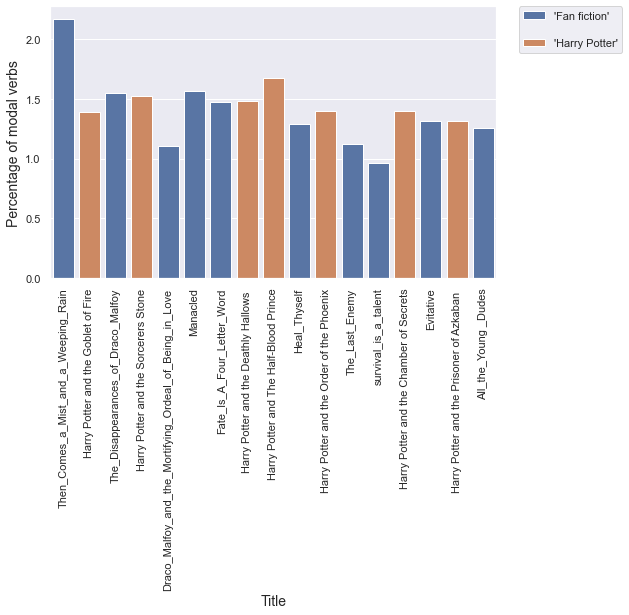

In [23]:
df_pos['modal_verb'] = df_pos['modal_verb']*100

fig = plt.figure( figsize=( 8,5 ) )


graph = sns.barplot( data=df_pos,x='title', y='modal_verb', 
                   hue = 'category' , dodge = False)

#graph.set_title('' , size = 20) 
graph.set_xlabel('Title' , size = 14) 
graph.set_ylabel('Percentage of modal verbs' , size = 14 )

plt.xticks(rotation=90)
plt.legend( bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.);
plt.show()

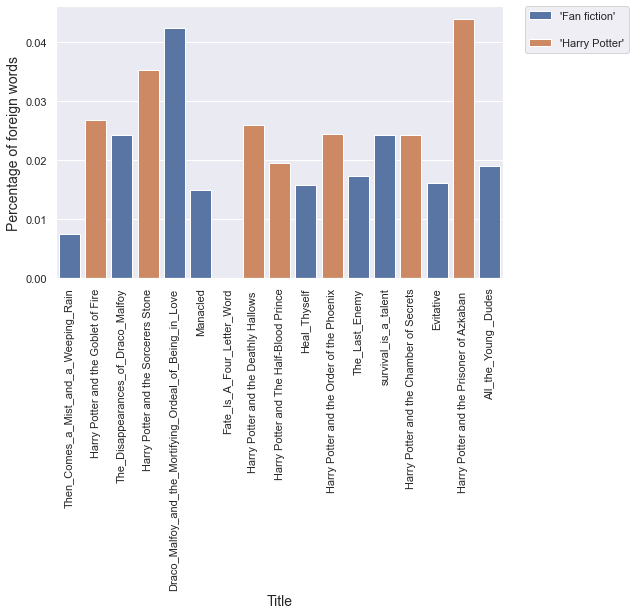

In [24]:
df_pos['foreign_word'] = df_pos['foreign_word']*100

fig = plt.figure( figsize=( 8,5 ) )


graph = sns.barplot( data=df_pos,x='title', y='foreign_word', 
                    hue = 'category' , dodge = False )

#graph.set_title('' , size = 20) 
graph.set_xlabel('Title' , size = 14) 
graph.set_ylabel('Percentage of foreign words' , size = 14 )

plt.xticks(rotation=90)
plt.legend( bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.);
plt.show()

In [25]:
df_pos['adj-comp-super'] = df_pos['adj-comp-super']*100
df_pos['adj'] = df_pos['adj']*100
df_pos['adv-comp-super'] = df_pos['adv-comp-super']*100
df_pos['adv'] = df_pos['adv']*100

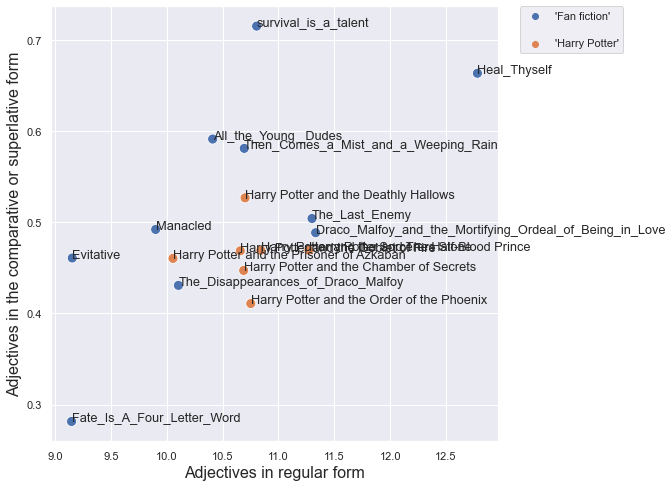

In [26]:
fig = plt.figure( figsize = ( 8,8 ))

x_axis='adj'
y_axis='adj-comp-super'

## This line adds spacing in between the lines of the legend 
sns.set(rc = {'legend.labelspacing': 1.6})

ax = sns.scatterplot( data=df_pos, x=x_axis, y=y_axis,  
                     hue = 'category',  s=100 )

for index, row in df_pos.iterrows():
    plt.text( row[x_axis], row[y_axis], row['title'] , fontsize=12.8)

ax.set_xlabel( 'Adjectives in regular form'  , fontsize = 16 )
ax.set_ylabel( 'Adjectives in the comparative or superlative form'  , fontsize = 16 )
#ax.set_title( '' , fontsize=24 )
plt.legend( bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.);
plt.show()

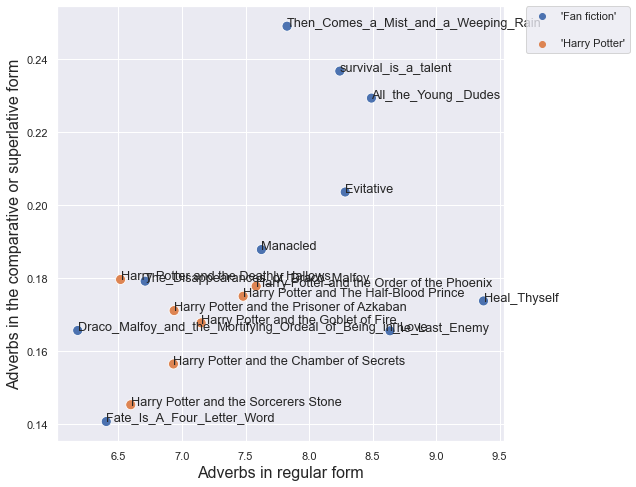

In [27]:
fig = plt.figure( figsize = ( 8,8 ))

x_axis='adv'
y_axis='adv-comp-super'

## This line adds spacing in between the lines of the legend 
sns.set(rc = {'legend.labelspacing': 1.6})

ax = sns.scatterplot( data=df_pos, x=x_axis, y=y_axis,  
                     hue='category',  s=100 )

for index, row in df_pos.iterrows():
    plt.text( row[x_axis], row[y_axis] , row['title'] , fontsize=12.8)


ax.set_xlabel( 'Adverbs in regular form'  , fontsize = 16 )
ax.set_ylabel( 'Adverbs in the comparative or superlative form'  , fontsize = 16 )
#ax.set_title( '' , fontsize=24 )
plt.legend( bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.);
plt.show()

## Hypernyms

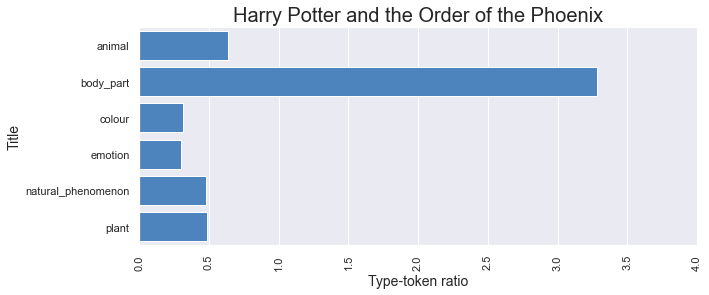



Most common emotions in "Harry Potter and the Order of the Phoenix"

anger (33); fear (28); fit (28); rage (25); alarm (25); temper (23); love (21); excitement (20); panic (17); horror (17); fury (16); shudder (14); happiness (14); dread (14); quiver (12); 

Most common colours in "Harry Potter and the Order of the Phoenix"

black (162); red (58); green (55); blue (34); purple (31); pink (27); scarlet (16); brown (15); yellow (11); blackness (4); blacks (3); amber (2); puce (2); magenta (1); sky-blue (1); 

Most common body_parts in "Harry Potter and the Order of the Phoenix"

back (796); head (454); face (443); eye (436); hand (430); foot (236); mouth (148); arm (132); shoulder (116); small (103); ear (82); nose (82); finger (64); wing (64); brain (59); 

Most common natural phenomena in "Harry Potter and the Order of the Phoenix"

light (128); low (78); quiet (32); exchange (27); drag (27); rain (26); smoke (24); snow (23); interrupt (22); drift (21); wind (20); sunlight (20); thru

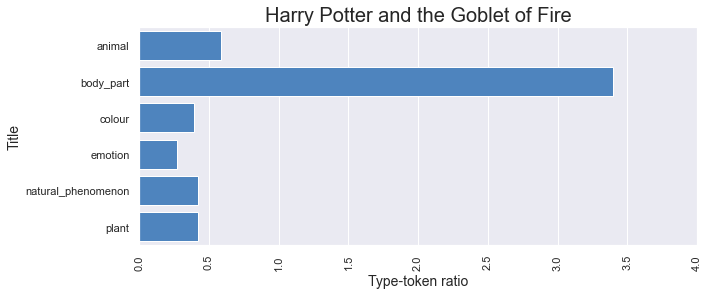



Most common emotions in "Harry Potter and the Goblet of Fire"

fear (29); love (22); excitement (20); panic (17); fit (17); hate (16); anger (15); quiver (13); shudder (10); alarm (10); fury (9); horror (9); terror (9); rage (6); outrage (6); 

Most common colours in "Harry Potter and the Goblet of Fire"

black (102); red (70); green (53); gray (30); brown (27); blue (27); pink (22); purple (21); scarlet (14); yellow (13); blackness (4); magenta (4); amber (2); crimson (2); complexion (1); 

Most common body_parts in "Harry Potter and the Goblet of Fire"

back (604); eye (403); face (341); hand (318); head (288); foot (198); arm (109); small (95); mouth (93); leg (81); finger (77); shoulder (70); nose (57); ear (53); wing (37); 

Most common natural phenomena in "Harry Potter and the Goblet of Fire"

light (112); low (37); quiet (33); drag (19); wind (19); cloud (14); rain (13); mist (12); smoke (11); weather (10); storm (10); lightning (8); heat (8); drift (6); snow (6); 

Most comm

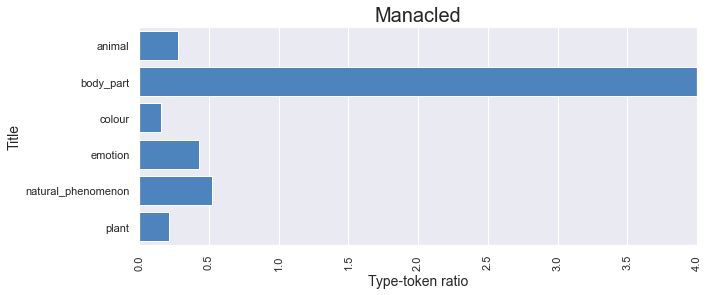



Most common emotions in "Manacled"

rage (109); love (97); horror (79); panic (76); hate (48); terror (42); fear (39); dread (32); shudder (31); fit (30); fury (24); hatred (18); tingle (11); bitterness (11); spite (9); 

Most common colours in "Manacled"

black (92); red (51); green (36); scarlet (32); blue (17); purple (13); yellow (8); pink (7); brown (5); mottle (4); drab (2); pallor (2); fuschia (1); 

Most common body_parts in "Manacled"

hand (1369); eye (1261); back (1146); head (642); face (540); finger (482); mouth (380); shoulder (364); arm (347); lip (288); chest (286); throat (272); jaw (201); skin (189); foot (163); 

Most common natural phenomena in "Manacled"

low (178); light (145); drag (137); quiet (85); heat (50); pressure (31); wind (28); bolt (22); necrosis (18); flood (16); current (16); snow (13); exchange (12); smoke (12); interrupt (12); 

Most common animals in "Manacled"

entire (102); reeve (82); molly (35); bear (27); horse (26); fly (21); snake (12); fe

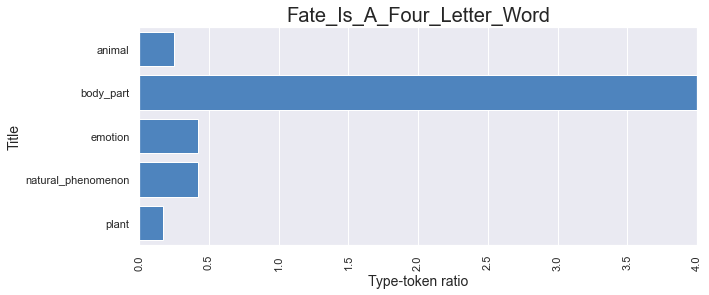



Most common emotions in "Fate_Is_A_Four_Letter_Word"

fear (1); excitement (1); shudder (1); dread (1); grudge (1); 

Most common colours in "Fate_Is_A_Four_Letter_Word"



Most common body_parts in "Fate_Is_A_Four_Letter_Word"

hand (11); back (8); face (6); eye (6); head (4); arm (3); cheek (2); knuckle (2); foot (2); leg (2); lid (2); chest (2); knee (1); fist (1); brain (1); 

Most common natural phenomena in "Fate_Is_A_Four_Letter_Word"

interrupt (2); energy (1); light (1); pressure (1); 

Most common animals in "Fate_Is_A_Four_Letter_Word"

female (1); male (1); bear (1); 

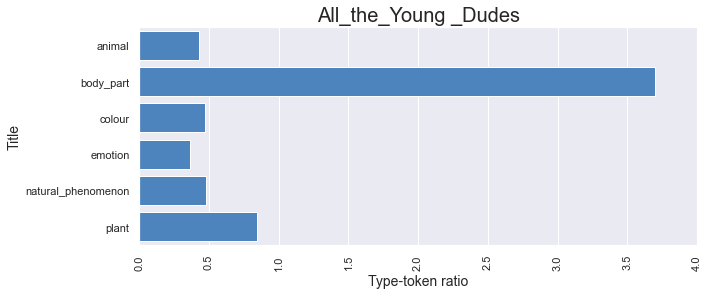



Most common emotions in "All_the_Young _Dudes"

love (362); hate (67); fit (51); excitement (47); rage (46); thrill (38); fear (37); temper (33); terror (33); panic (28); joy (27); alarm (24); anger (23); horror (20); shudder (20); 

Most common colours in "All_the_Young _Dudes"

black (577); red (202); blue (114); green (95); pink (84); yellow (54); brown (44); purple (23); blacks (20); scarlet (8); amber (5); crimson (5); mauve (3); beige (2); blackness (2); 

Most common body_parts in "All_the_Young _Dudes"

back (1909); head (1098); eye (1062); hand (927); face (573); arm (481); shoulder (332); foot (230); small (224); lip (215); mouth (174); finger (146); hip (111); ear (103); cheek (100); 

Most common natural phenomena in "All_the_Young _Dudes"

quiet (238); light (215); smoke (97); low (92); drag (55); rain (52); energy (46); wind (40); storm (32); interrupt (30); snow (27); drift (27); heat (26); cloud (26); sunshine (23); 

Most common animals in "All_the_Young _Dudes"

fly

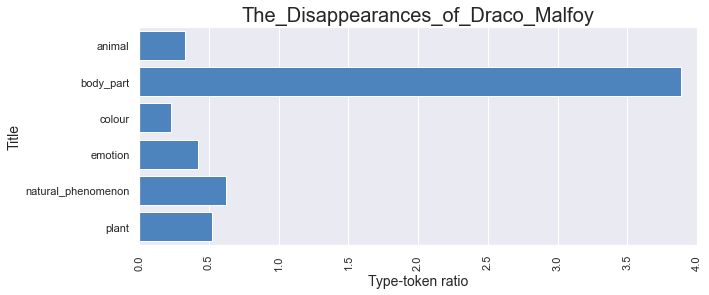



Most common emotions in "The_Disappearances_of_Draco_Malfoy"

fear (104); love (75); panic (50); anger (47); fit (30); excitement (30); terror (25); alarm (24); dread (22); rage (20); horror (14); fury (12); thrill (12); hatred (11); hate (11); 

Most common colours in "The_Disappearances_of_Draco_Malfoy"

black (92); red (74); green (43); blue (42); pink (16); purple (13); brown (12); crimson (9); yellow (7); gray (3); amber (3); tint (3); scarlet (3); complexion (2); pastel (1); 

Most common body_parts in "The_Disappearances_of_Draco_Malfoy"

back (973); eye (692); face (588); hand (574); head (336); foot (196); shoulder (176); mouth (175); small (151); arm (145); lip (124); cheek (95); finger (90); throat (86); chest (73); 

Most common natural phenomena in "The_Disappearances_of_Draco_Malfoy"

light (221); low (71); quiet (64); exchange (48); heat (44); wind (40); flood (40); drag (31); drift (24); storm (21); cloud (18); thrust (18); rain (18); sunlight (14); smoke (14); 

Most

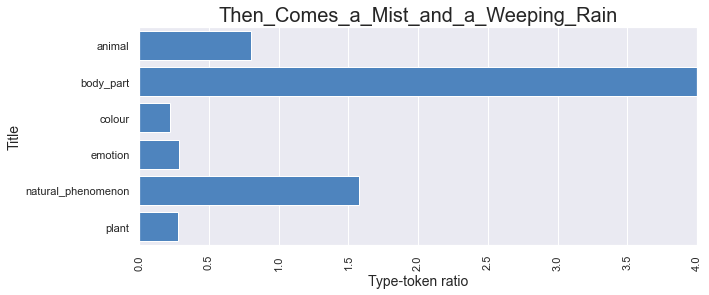



Most common emotions in "Then_Comes_a_Mist_and_a_Weeping_Rain"

panic (4); love (4); fright (3); horror (2); fear (2); shudder (2); excitement (2); rage (1); happiness (1); bitterness (1); hatred (1); tingle (1); fit (1); animosity (1); quiver (1); 

Most common colours in "Then_Comes_a_Mist_and_a_Weeping_Rain"

green (7); red (5); black (5); brown (2); blue (2); yellow (1); purple (1); crimson (1); greyness (1); 

Most common body_parts in "Then_Comes_a_Mist_and_a_Weeping_Rain"

back (74); head (50); eye (47); hand (41); lip (27); face (21); wing (18); small (15); mouth (14); finger (13); cheek (11); throat (10); arm (9); antler (7); cock (7); 

Most common natural phenomena in "Then_Comes_a_Mist_and_a_Weeping_Rain"

cloud (73); rain (44); quiet (6); mist (6); low (5); lightning (5); drag (5); heat (5); weather (4); light (3); storm (3); downpour (2); pressure (2); drizzle (2); wind (2); 

Most common animals in "Then_Comes_a_Mist_and_a_Weeping_Rain"

peacock (27); stag (19); fly (1

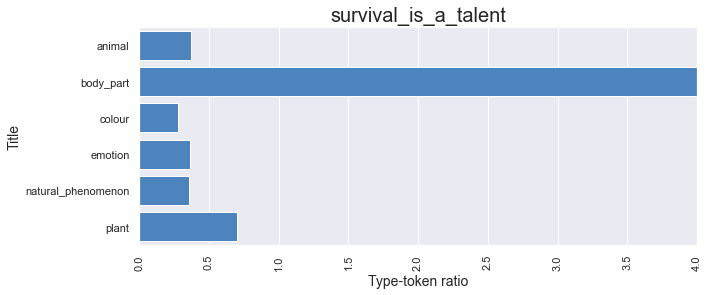



Most common emotions in "survival_is_a_talent"

love (284); hate (118); fit (68); panic (64); anger (62); fear (41); thrill (26); alarm (22); temper (18); spite (15); happiness (14); rage (14); outrage (12); fury (11); excitement (9); 

Most common colours in "survival_is_a_talent"

red (150); black (141); green (123); blue (83); purple (42); brown (39); pink (39); yellow (26); blacks (5); browns (5); fawn (2); gray (2); drab (1); beige (1); complexion (1); 

Most common body_parts in "survival_is_a_talent"

back (1591); hand (1285); eye (963); head (860); face (787); arm (475); shoulder (368); mouth (300); foot (226); skin (177); lip (162); small (148); finger (142); nose (130); chest (130); 

Most common natural phenomena in "survival_is_a_talent"

light (143); drag (92); quiet (72); elves (72); low (69); interrupt (40); energy (33); current (32); heat (26); wind (24); smoke (24); bond (21); exchange (18); bolt (17); cloud (17); 

Most common animals in "survival_is_a_talent"

snak

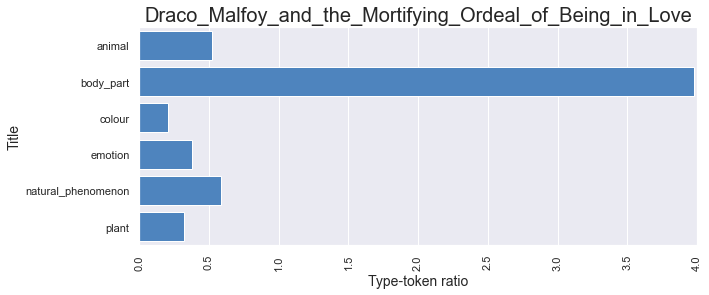



Most common emotions in "Draco_Malfoy_and_the_Mortifying_Ordeal_of_Being_in_Love"

love (83); alarm (28); shudder (26); joy (21); fear (20); hate (15); panic (14); thrill (14); fit (12); horror (11); dread (11); quiver (10); happiness (9); excitement (8); anger (7); 

Most common colours in "Draco_Malfoy_and_the_Mortifying_Ordeal_of_Being_in_Love"

green (52); black (51); red (32); blue (21); pink (20); yellow (10); purple (8); brown (4); mauve (2); tint (2); crimson (2); complementary (1); scarlet (1); 

Most common body_parts in "Draco_Malfoy_and_the_Mortifying_Ordeal_of_Being_in_Love"

hand (473); back (441); eye (340); head (214); face (185); arm (163); mouth (135); finger (135); small (134); shoulder (105); foot (100); lip (93); skull (85); neck (73); chest (64); 

Most common natural phenomena in "Draco_Malfoy_and_the_Mortifying_Ordeal_of_Being_in_Love"

light (98); low (50); quiet (38); wind (38); drift (35); interrupt (33); heat (23); rain (19); breeze (18); cloud (16); excha

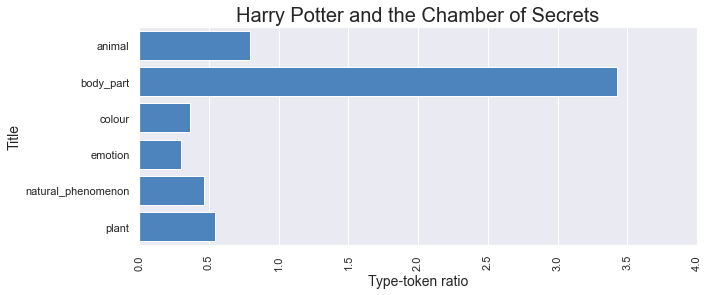



Most common emotions in "Harry Potter and the Chamber of Secrets"

fear (17); fit (13); love (11); horror (9); terror (8); panic (8); excitement (6); fury (6); anger (6); shudder (6); rage (5); quiver (5); dread (5); temper (4); hate (4); 

Most common colours in "Harry Potter and the Chamber of Secrets"

black (49); green (21); red (19); pink (13); blue (13); gray (13); scarlet (13); purple (8); brown (7); yellow (6); blackness (3); crimson (2); mottle (1); mauve (1); magenta (1); 

Most common body_parts in "Harry Potter and the Chamber of Secrets"

back (295); eye (171); head (142); face (140); hand (128); foot (75); arm (55); small (54); mouth (48); ear (45); nose (37); shoulder (35); wing (28); finger (28); leg (21); 

Most common natural phenomena in "Harry Potter and the Chamber of Secrets"

light (37); low (20); quiet (14); cloud (13); smoke (10); rain (9); wind (8); nimbus (8); flood (7); drag (7); exchange (6); moonlight (5); storm (5); sunlight (5); candlelight (5); 

Most

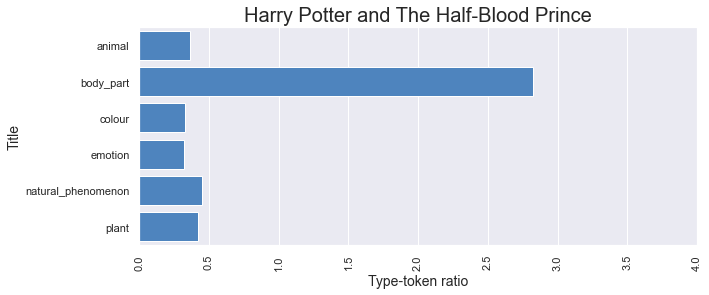



Most common emotions in "Harry Potter and The Half-Blood Prince"

love (54); fear (28); alarm (16); spite (15); rage (13); panic (12); anger (12); excitement (12); horror (10); fury (9); fit (9); shudder (9); hate (8); quiver (7); outrage (5); 

Most common colours in "Harry Potter and The Half-Blood Prince"

black (95); green (34); red (30); pink (21); brown (19); blue (18); purple (17); yellow (13); scarlet (13); gray (9); crimson (6); amber (2); blacks (2); pallor (2); magenta (2); 

Most common body_parts in "Harry Potter and The Half-Blood Prince"

back (428); hand (317); eye (248); face (242); head (190); foot (130); arm (106); mouth (62); small (61); shoulder (58); nose (48); finger (42); ear (33); chest (30); wing (29); 

Most common natural phenomena in "Harry Potter and The Half-Blood Prince"

light (92); low (43); quiet (23); wind (18); exchange (14); smoke (14); interrupt (13); mist (11); puff (11); snow (11); sunlight (11); weather (10); drag (8); storm (8); thrust (7); 

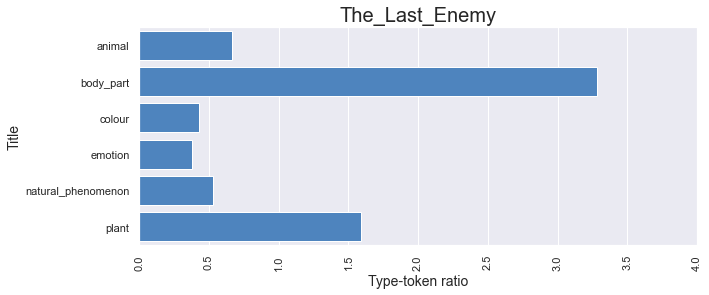



Most common emotions in "The_Last_Enemy"

love (65); fury (32); rage (28); panic (23); hate (22); fear (21); horror (18); temper (16); fit (16); thrill (16); anger (12); dread (11); terror (9); spite (9); shudder (9); 

Most common colours in "The_Last_Enemy"

black (299); red (37); pink (26); blacks (17); green (17); blue (15); brown (7); gray (7); purple (5); scarlet (5); yellow (5); fawn (5); crimson (4); amber (1); 

Most common body_parts in "The_Last_Enemy"

back (628); face (312); eye (310); hand (285); head (268); arm (134); small (95); shoulder (87); foot (79); finger (76); mouth (71); wing (64); nose (58); cheek (52); quick (50); 

Most common natural phenomena in "The_Last_Enemy"

light (63); quiet (55); storm (33); wind (32); low (31); interrupt (31); exchange (29); drag (25); drift (19); snow (19); rain (16); current (14); sunlight (14); smoke (14); fog (12); 

Most common animals in "The_Last_Enemy"

dog (71); rat (60); owl (52); wolf (48); stag (41); fly (34); owls (33

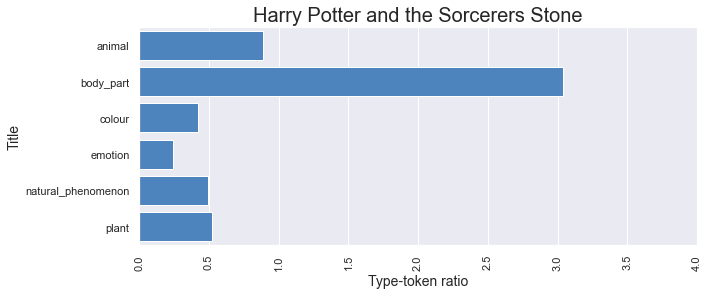



Most common emotions in "Harry Potter and the Sorcerers Stone"

fear (12); horror (10); quiver (9); hate (9); fit (7); panic (6); excitement (5); love (5); anger (4); rage (4); temper (4); shudder (3); tantrum (3); terror (2); fury (2); 

Most common colours in "Harry Potter and the Sorcerers Stone"

black (50); green (28); red (26); purple (13); pink (13); gray (11); blue (11); brown (8); scarlet (6); yellow (4); iron-gray (1); amber (1); mauve (1); ebony (1); blacks (1); 

Most common body_parts in "Harry Potter and the Sorcerers Stone"

back (267); head (121); eye (116); hand (111); face (106); foot (63); arm (44); nose (38); small (37); leg (30); mouth (25); shoulder (22); ear (22); neck (20); finger (17); 

Most common natural phenomena in "Harry Potter and the Sorcerers Stone"

light (39); low (18); nimbus (16); quiet (13); wind (12); storm (11); drag (10); bolt (7); smoke (7); moonlight (6); lightning (6); puff (5); cloud (5); flood (4); weather (4); 

Most common animals in "

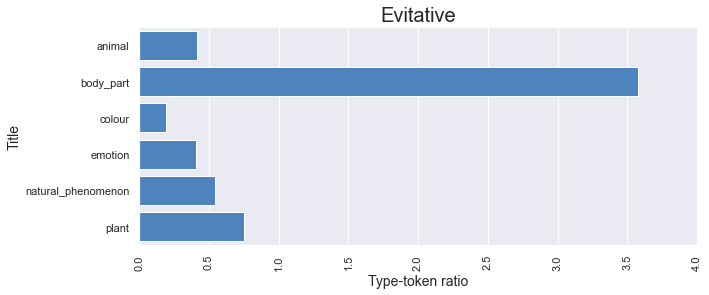



Most common emotions in "Evitative"

anger (49); fear (47); love (45); hate (42); horror (34); alarm (30); fury (26); hatred (25); fit (18); temper (16); rage (12); shudder (11); thrill (10); excitement (9); trepidation (9); 

Most common colours in "Evitative"

black (109); red (35); green (21); purple (20); pink (8); blue (7); blacks (3); gray (3); yellow (3); brown (2); complementary (1); complexion (1); 

Most common body_parts in "Evitative"

eye (681); back (621); head (572); hand (405); face (356); arm (139); foot (112); mouth (106); shoulder (100); lip (90); finger (58); small (57); stomach (48); ear (36); palm (29); 

Most common natural phenomena in "Evitative"

affinity (158); light (127); wind (51); quiet (45); drag (34); drift (24); low (20); exchange (15); bolt (11); flood (10); snow (10); lightning (8); fume (8); interrupt (8); thrust (7); 

Most common animals in "Evitative"

snake (90); fly (59); entire (59); owls (39); owl (33); bat (20); pureblood (17); bear (16); 

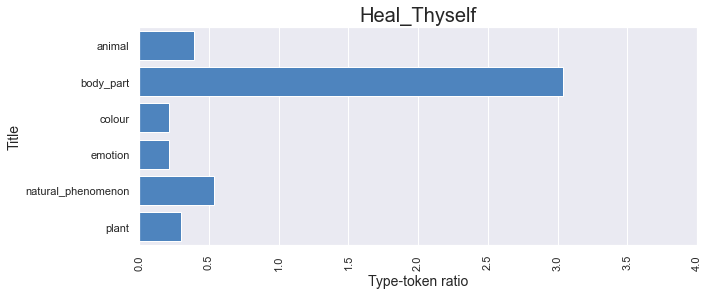



Most common emotions in "Heal_Thyself"

alarm (5); horror (4); outrage (4); hate (4); fit (3); love (3); exasperation (3); indignation (3); happiness (2); panic (2); resentment (2); terror (2); malevolence (1); tingle (1); fury (1); 

Most common colours in "Heal_Thyself"

black (13); blue (12); green (9); pink (4); red (4); purple (2); brown (1); vermilion (1); blacks (1); 

Most common body_parts in "Heal_Thyself"

back (170); hand (85); head (63); eye (51); small (30); face (30); arm (25); shoulder (13); shin (12); foot (10); mouth (9); skin (9); cheek (8); finger (8); quick (7); 

Most common natural phenomena in "Heal_Thyself"

light (43); drag (8); low (5); quiet (5); heat (5); starlight (4); energy (3); sunshine (3); radiance (3); rain (3); cloud (3); quake (2); smoke (2); pressure (2); elves (2); 

Most common animals in "Heal_Thyself"

entire (21); fly (9); newts (4); pureblood (4); owl (4); goose (4); earthworm (4); stray (3); cat (3); bear (3); drone (2); placental (2); fi

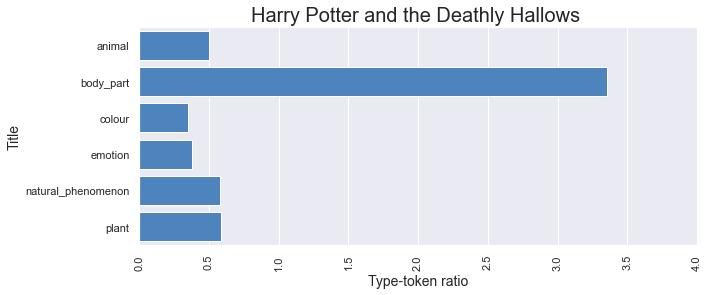



Most common emotions in "Harry Potter and the Deathly Hallows "

fear (67); love (49); anger (23); fit (23); panic (22); fury (20); terror (18); excitement (16); horror (13); rage (12); dread (9); shudder (8); hate (7); happiness (6); tingle (6); 

Most common colours in "Harry Potter and the Deathly Hallows "

black (93); red (56); green (51); blue (40); gray (22); scarlet (20); purple (17); pink (17); yellow (11); brown (10); blackness (6); whiteness (2); mauve (1); sanguine (1); mottle (1); 

Most common body_parts in "Harry Potter and the Deathly Hallows "

back (559); eye (390); hand (361); face (328); head (258); foot (157); arm (146); small (127); finger (87); shoulder (68); mouth (58); chest (54); neck (51); ear (49); nose (43); 

Most common natural phenomena in "Harry Potter and the Deathly Hallows "

light (171); low (57); drag (39); snow (35); quiet (24); rain (23); wind (22); smoke (18); mist (12); cloud (12); heat (12); drift (12); exchange (12); thrust (10); flood (10)

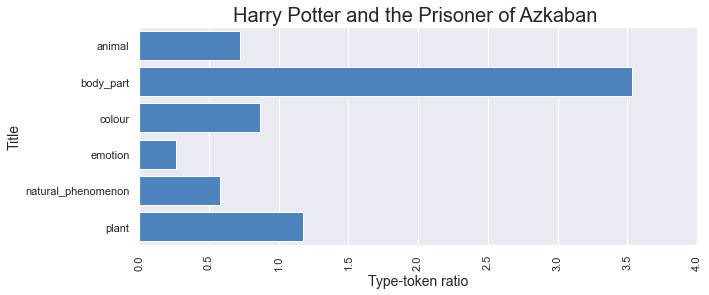



Most common emotions in "Harry Potter and the Prisoner of Azkaban "

alarm (12); fear (12); love (10); panic (10); fury (9); anger (9); dread (9); terror (8); excitement (8); rage (7); happiness (7); quiver (6); shudder (6); fit (6); horror (6); 

Most common colours in "Harry Potter and the Prisoner of Azkaban "

black (372); red (26); green (17); gray (14); brown (14); scarlet (12); pink (9); yellow (9); purple (7); blue (5); crimson (4); blacks (3); puce (1); amber (1); tint (1); 

Most common body_parts in "Harry Potter and the Prisoner of Azkaban "

back (356); hand (205); eye (204); head (182); face (182); foot (95); arm (70); small (52); mouth (51); wing (41); leg (39); shoulder (38); ear (38); finger (34); neck (30); 

Most common natural phenomena in "Harry Potter and the Prisoner of Azkaban "

light (46); low (32); quiet (25); wind (23); rain (19); nimbus (15); drag (14); cloud (13); drift (13); interrupt (10); fog (9); weather (9); smoke (9); mist (8); snow (7); 

Most com

In [28]:
import warnings
warnings.filterwarnings("ignore")

def wordnet_hypernyms(token):
    all_hypernyms = []
    black_list = ['queen','young','human']
    
    if token not in black_list:
        
        word_senses = wn.synsets(token)

        hypernyms = lambda s: s.hypernyms()

        return_value = False

        for ws in word_senses:

            hypernyms = [hyp.name() for hyp in list(ws.closure(hypernyms))]

            if 'plant.n.02' in hypernyms:
                all_hypernyms.append('plant')
            if 'color.n.01' in hypernyms:
                all_hypernyms.append('colour')
            if 'emotion.n.01' in hypernyms:
                all_hypernyms.append('emotion')
            if 'animal.n.01' in hypernyms:
                all_hypernyms.append('animal')
            if 'natural_phenomenon.n.01' in hypernyms:
                all_hypernyms.append('natural_phenomenon')
            if 'body_part.n.01' in hypernyms:
                all_hypernyms.append('body_part')
                                    
    return all_hypernyms

for file in os.listdir(directory):
    
    if re.search( 'lemma.txt',file ):
        data = []
        
        key = os.path.join(directory,re.sub('_lemma','',file))
        title = find_title(key)
        path = os.path.join(directory,file)
        with open(path,encoding='utf') as fh:
            full_text = fh.read()
            words = word_tokenize(full_text.lower())
            words = clean_wordlist(words)
            freq = Counter(words)

            for word,count in freq.most_common():
                hypernyms = wordnet_hypernyms(word)
                if len(hypernyms)>0:
                    for h in hypernyms:
                        row = []
                        row.append(word)
                        row.append(h)
                        row.append(count)
                        data.append(row)
                        
        df = pd.DataFrame(data,columns=['word','domain','count'])
                        
                        

        x_axis = list(df.groupby('domain')['count'].sum().to_dict().values())
        # normalise values
        x_axis = [(value/nr_tokens[key])*100 for value in x_axis]
        y_axis = list(df.groupby('domain')['count'].sum().to_dict().keys())
                                
        colours = ['#599ad3','#f9a65a']

        fig = plt.figure( figsize=( 10,4 ) )

        graph = sns.barplot( x=x_axis, y=y_axis, 
                            color = '#3b83d1' )

        graph.set_title(title , size = 20) 
        graph.set_xlabel('Type-token ratio' , size = 14) 
        graph.set_ylabel('Title' , size = 14 )
        
        graph.set_xlim(0,4)


        plt.xticks(rotation= 90)

        plt.show()
        
        print(f'\n\nMost common emotions in "{find_title(key)}"\n')
        
        count = 0
        for i,row in df.query(' domain=="emotion" ').sort_values(by='count',ascending=False).iterrows():
            print(f"{row['word']} ({row['count']})" , end= '; ' )
            count += 1
            if count==15:
                break
                
        print(f'\n\nMost common colours in "{find_title(key)}"\n')
        
        count = 0
        for i,row in df.query(' domain=="colour" ').sort_values(by='count',ascending=False).iterrows():
            print(f"{row['word']} ({row['count']})" , end= '; ' )
            count += 1
            if count==15:
                break
        
        print(f'\n\nMost common body_parts in "{find_title(key)}"\n')
        
        count = 0
        for i,row in df.query(' domain=="body_part" ').sort_values(by='count',ascending=False).iterrows():
            print(f"{row['word']} ({row['count']})" , end= '; ' )
            count += 1
            if count==15:
                break
        
        
        print(f'\n\nMost common natural phenomena in "{find_title(key)}"\n')
        
        count = 0
        for i,row in df.query(' domain=="natural_phenomenon" ').sort_values(by='count',ascending=False).iterrows():
            print(f"{row['word']} ({row['count']})" , end= '; ' )
            count += 1
            if count==15:
                break
        
        print(f'\n\nMost common animals in "{find_title(key)}"\n')
        
        count = 0
        for i,row in df.query(' domain=="animal" ').sort_values(by='count',ascending=False).iterrows():
            print(f"{row['word']} ({row['count']})" , end= '; ' )
            count += 1
            if count==15:
                break
                

## Sentiment analysis

In [29]:

def average_score(file):
    all_scores = []
    file = open( file , encoding = 'utf-8' )
    full_text = file.read()
    sentences = sent_tokenize( full_text )
    for s in sentences:
        scores = ana.polarity_scores(s)
        all_scores.append( scores["pos"] )
    return sum(all_scores)/len(all_scores)
        
sent_scores = dict()

for text in corpus:

    avg_score = average_score(text)
    sent_scores[text]=avg_score
    

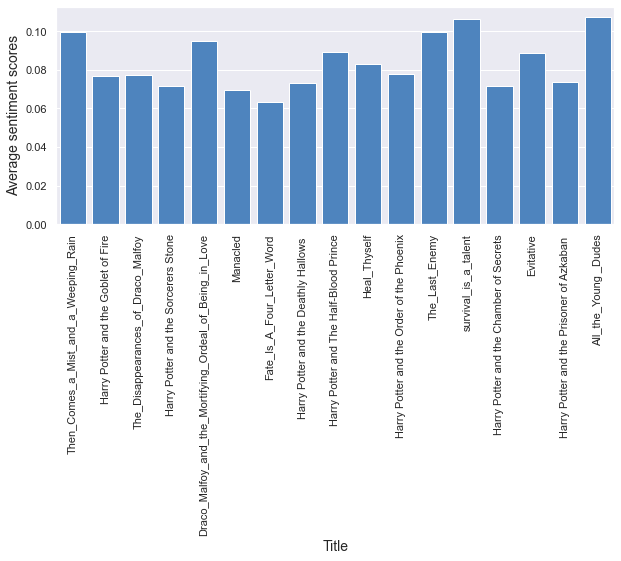

In [30]:
x_axis = list(sent_scores.keys())
y_axis = list(sent_scores.values())

x_axis = [find_title(text) for text in x_axis]

fig = plt.figure( figsize=( 10,4 ) )

graph = sns.barplot( x=x_axis, y=y_axis, 
                    color = '#3b83d1' , dodge = False )

#graph.set_title( '' , size = 20) 
graph.set_xlabel('Title' , size = 14 )
graph.set_ylabel('Average sentiment scores' , size = 14) 

plt.xticks(rotation=90)

plt.show()